In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv("diabetes.csv")
X = data[['Glucose' , 'BMI', 'BloodPressure', 'Age']].values

X_min = X.min(axis=0)
X_max = X.max(axis=0) 
X = (X - X_min) / (X_max - X_min)

print(X)
plt.scatter(data['Glucose'] , data['Age'])
plt.savefig(f"plots2/scatter.png")
plt.close()


[[0.74371859 0.50074516 0.59016393 0.48333333]
 [0.42713568 0.39642325 0.54098361 0.16666667]
 [0.91959799 0.34724292 0.52459016 0.18333333]
 ...
 [0.6080402  0.390462   0.59016393 0.15      ]
 [0.63316583 0.4485842  0.49180328 0.43333333]
 [0.46733668 0.45305514 0.57377049 0.03333333]]


In [3]:

def euclidean_distance(a, b):
    return sqrt(np.sum((a - b) ** 2))

def fuzzy_c_means(X, n_clusters=5, m=2.0, max_iter=100, error=1e-5):
    n, d = X.shape
    U = np.random.rand(n, n_clusters)
    U = U / np.sum(U, axis=1, keepdims=True)

    for _ in range(max_iter):
        U_m = U ** m
        centers = (U_m.T @ X) / np.sum(U_m.T, axis=1, keepdims=True)
        dist = np.zeros((n, n_clusters))
        for i in range(n):
            for j in range(n_clusters):
                dist[i, j] = euclidean_distance(X[i], centers[j]) + 1e-10

        new_U = np.zeros(U.shape)
        for i in range(n):
            for j in range(n_clusters):
                denom = np.sum((dist[i, j] / dist[i, :]) ** (2 / (m - 1)))
                new_U[i, j] = 1 / denom

        if np.sum((new_U - U) ** 2) ** 0.5 < error:
            break
        U = new_U
    return centers, U



In [4]:
M = [2,4]

m_1 = fuzzy_c_means(X, n_clusters=3, m=2.0, max_iter=100, error=1e-5)
m_2 = fuzzy_c_means(X, n_clusters=3, m=4, max_iter=100, error=1e-5)


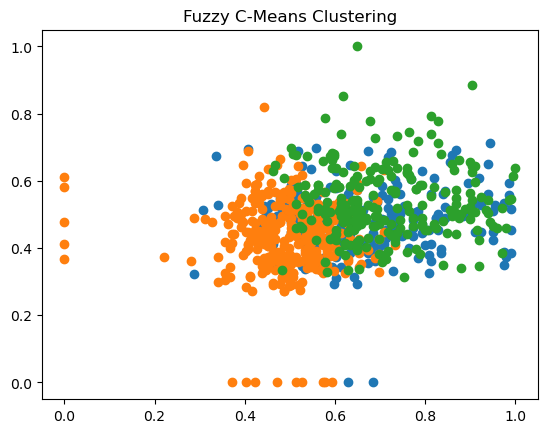

[0 1 2 1 2 1 1 1 0 0 2 2 0 0 0 1 2 1 1 2 2 0 0 2 0 0 0 1 0 2 0 2 1 1 0 1 2
 0 1 0 2 2 0 0 0 2 2 1 2 1 1 1 1 0 0 1 0 2 0 1 1 2 1 2 0 1 2 0 1 2 1 2 0 2
 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 1 1 2 0 0 2 0 1 1 1 2 2 2 2 1 1 1 2 2 1 1 2
 0 1 1 2 0 2 1 1 1 2 1 1 0 1 1 2 1 0 0 2 2 2 1 1 2 1 1 2 1 0 2 1 0 2 1 1 1
 0 1 2 1 0 2 0 2 1 1 1 0 2 0 2 1 2 0 2 2 1 2 2 2 1 1 1 2 0 2 0 2 1 1 1 1 0
 0 0 2 1 2 1 0 2 2 1 2 1 1 1 2 1 2 1 1 0 1 0 0 1 0 1 2 0 2 2 2 1 2 1 0 2 0
 1 0 1 1 1 2 2 2 2 0 1 2 1 2 0 2 2 1 1 1 1 1 2 0 0 2 2 1 0 2 1 1 0 1 1 1 2
 0 2 1 1 0 2 0 1 2 1 1 2 1 0 1 0 1 1 1 0 1 2 2 2 0 0 0 2 2 1 2 1 1 2 2 0 2
 2 2 0 0 2 2 1 2 2 2 0 1 2 2 1 1 2 1 0 1 1 2 2 0 2 1 2 0 1 2 2 2 2 2 0 1 2
 0 1 2 1 0 2 0 1 1 1 2 0 0 1 1 1 1 2 2 0 1 1 0 1 1 0 2 2 0 0 0 2 1 2 1 1 0
 2 1 1 1 1 0 1 1 2 2 1 1 1 1 1 1 2 0 0 1 0 2 1 2 2 1 1 2 1 2 1 0 2 1 0 2 0
 1 0 2 2 1 2 2 2 2 1 2 1 2 2 1 1 1 2 2 1 2 2 0 1 1 1 2 1 1 0 2 1 2 0 1 1 1
 1 2 1 1 1 2 1 2 1 0 1 2 0 1 0 0 0 1 1 1 2 1 1 1 1 2 2 2 2 0 1 0 2 1 0 0 2
 2 1 1 2 2 2 0 1 0 1 0 1 

In [ ]:
centers, U = m_1
labels = np.argmax(U, axis=1)

plt.figure(figsize=(7, 6))
for i in range(5):
    plt.scatter(X[labels == i, 0], X[labels == i, 1])
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200)
plt.title('Fuzzy C-Means Clustering')
plt.savefig("plots2/fuzzy_cmeans_clusters1.png")
plt.show()

df_results = pd.DataFrame(labels, columns=["labels"])
df_results.to_csv("results2/labels_for_2.csv", index=True)


def silhouette_score(labels):
    data = X
    n = len(data)
    sil = np.zeros(n)
    for i in range(n):
        same_cluster = [euclidean_distance(data[i], data[j]) for j in range(n) if labels[j] == labels[i] and j != i]
        a = np.mean(same_cluster) if same_cluster else 0

        other_means = []
        for k in np.unique(labels):
            if k != labels[i]:
                other = [euclidean_distance(data[i], data[j]) for j in range(n) if labels[j] == k]
                if other:
                    other_means.append(np.mean(other))
        b = min(other_means) if other_means else 0

        sil[i] = 0 if max(a, b) == 0 else (b - a) / max(a, b)
    return np.mean(sil)

print(labels)
score = silhouette_score(labels)
print(score)

a = []
a.append(score)

df_results = pd.DataFrame(a, columns=["silhouette_score"])

df_results.to_csv(f"results2/silhouette_score_2.csv", index=False)

a = []
a.append(centers)

print(centers)
df_results = pd.DataFrame(centers, columns=["x1","x2","x3","x4"])

df_results.to_csv(f"results2/centroids_2.csv", index=False)




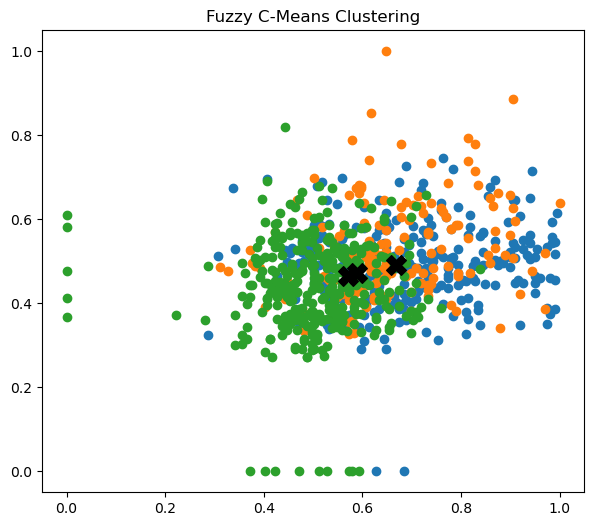

[0 2 0 2 1 2 2 2 0 0 1 0 0 0 0 2 1 2 2 1 1 0 0 1 0 0 0 2 0 0 0 1 2 2 0 2 0
 0 2 0 1 0 0 0 0 1 1 2 1 2 2 2 2 0 0 2 0 1 0 2 2 0 2 2 0 2 0 0 2 1 2 1 0 1
 2 2 1 2 2 2 2 2 2 2 0 2 0 2 0 2 2 1 0 0 2 0 2 2 2 1 0 2 2 2 2 2 1 0 2 2 1
 0 2 2 0 0 0 2 2 2 1 2 2 0 2 2 1 2 0 0 0 1 1 1 2 1 2 2 1 2 0 0 2 0 1 2 2 1
 0 2 1 1 0 1 0 0 2 2 2 0 0 0 1 2 1 0 1 1 2 1 1 1 2 2 2 0 0 1 0 0 2 2 2 2 0
 0 0 0 1 1 2 0 0 1 2 1 2 2 2 1 2 1 2 2 0 2 0 0 2 0 2 1 0 1 0 0 2 1 2 0 1 0
 2 0 2 2 2 1 0 1 1 0 2 1 2 1 0 1 0 2 2 2 2 2 1 0 0 1 1 2 0 1 2 2 0 2 2 2 1
 0 0 2 2 0 1 0 2 2 2 2 0 2 0 2 0 2 2 2 0 2 1 0 0 0 0 0 0 1 2 1 2 2 1 2 0 1
 1 1 0 0 2 1 2 1 0 1 0 2 2 1 1 2 1 2 0 2 2 0 2 0 1 2 1 0 2 1 1 0 2 1 0 2 0
 0 2 1 1 0 0 0 2 1 2 1 0 0 2 2 2 2 2 1 0 2 2 0 2 0 0 0 0 0 0 0 1 2 1 2 2 0
 1 2 2 2 2 0 2 2 0 1 2 2 2 2 2 2 1 0 0 2 0 1 2 1 0 2 2 2 2 1 2 0 0 2 0 2 0
 2 0 1 1 2 1 2 2 1 2 0 2 2 1 2 2 2 0 0 2 0 1 0 2 1 2 1 2 2 0 1 2 1 0 2 2 1
 2 1 2 2 2 2 2 2 2 0 2 0 0 2 0 0 0 2 1 1 1 2 2 2 2 1 1 2 2 0 2 0 2 1 0 0 0
 1 2 2 2 1 2 0 2 0 2 0 2 

In [16]:
centers, U = m_2
labels = np.argmax(U, axis=1)

plt.figure(figsize=(7, 6))
for i in range(5):
    plt.scatter(X[labels == i, 0], X[labels == i, 1])
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200)
plt.title('Fuzzy C-Means Clustering')
plt.savefig("plots2/fuzzy_cmeans_clusters2.png")
plt.show()

df_results = pd.DataFrame(labels, columns=["labels"])
df_results.to_csv("results2/labels_for_4.csv", index=True)


def silhouette_score(labels):
    data = X
    n = len(data)
    sil = np.zeros(n)
    for i in range(n):
        same_cluster = [euclidean_distance(data[i], data[j]) for j in range(n) if labels[j] == labels[i] and j != i]
        a = np.mean(same_cluster) if same_cluster else 0

        other_means = []
        for k in np.unique(labels):
            if k != labels[i]:
                other = [euclidean_distance(data[i], data[j]) for j in range(n) if labels[j] == k]
                if other:
                    other_means.append(np.mean(other))
        b = min(other_means) if other_means else 0

        sil[i] = 0 if max(a, b) == 0 else (b - a) / max(a, b)
    return np.mean(sil)

print(labels)
score = silhouette_score(labels)
print(score)

a = []
a.append(score)

df_results = pd.DataFrame(a, columns=["silhouette_score"])

df_results.to_csv(f"results2/silhouette_score_4.csv", index=False)

a = []
a.append(centers)

print(centers)
df_results = pd.DataFrame(centers, columns=["x1","x2","x3","x4"])

df_results.to_csv(f"results2/centroids_4.csv", index=False)




In [17]:
centers, U = m_1
labels = np.argmax(U, axis=1)

results = []

for _ in range(10):
    i = np.random.randint(1,len(labels))
    results.append(U[i])

df_results = pd.DataFrame(results, columns=["x1","x2","x3"])
df_results.to_csv(f"results2/u.csv", index=False)



In [24]:
W = []
for i in range(len(labels)):
    if(np.max(U[i]) <= 0.5):
        W.append(X[i])


print(W)
df_results = pd.DataFrame(W, columns=["x1","x2","x3","x4"])
df_results.to_csv(f"results2/W.csv", index=False)

print(len(W))
a = []
a.append(len(W))
df_results = pd.DataFrame(a, columns=["size of w"])
df_results.to_csv(f"results2/W_size.csv", index=False)

[array([0.91959799, 0.34724292, 0.52459016, 0.18333333]), array([0.68844221, 0.64232489, 0.32786885, 0.2       ]), array([0.58291457, 0.38152012, 0.60655738, 0.15      ]), array([0.57788945, 0.52608048, 0.        , 0.13333333]), array([0.6281407 , 0.        , 0.78688525, 0.55      ]), array([0.50251256, 0.44709389, 0.        , 0.18333333]), array([0.51758794, 0.64530551, 0.24590164, 0.2       ]), array([0.98492462, 0.59314456, 0.73770492, 0.33333333]), array([0.5879397 , 0.50819672, 0.75409836, 0.28333333]), array([0.46231156, 0.29657228, 0.75409836, 0.11666667]), array([0.79899497, 0.40834575, 0.52459016, 0.31666667]), array([0.51758794, 0.58271237, 0.54098361, 0.16666667]), array([0.52763819, 0.        , 0.        , 0.05      ]), array([0.93969849, 0.56184799, 0.55737705, 0.33333333]), array([0.50251256, 0.69746647, 0.72131148, 0.16666667]), array([0.42211055, 0.        , 0.        , 0.        ]), array([0.66834171, 0.49031297, 0.59016393, 0.3       ]), array([0.70854271, 0.37853949,

In [25]:
W = []
for i in range(len(labels)):
    if(np.max(U[i]) >= 0.8):
        W.append(X[i])


print(W)
df_results = pd.DataFrame(W, columns=["x1","x2","x3","x4"])
df_results.to_csv(f"results2/W2.csv", index=False)

print(len(W))
a = []
a.append(len(W))
df_results = pd.DataFrame(a, columns=["size of w2"])
df_results.to_csv(f"results2/W2_size.csv", index=False)

[array([0.74371859, 0.50074516, 0.59016393, 0.48333333]), array([0.44723618, 0.41877794, 0.54098361, 0.        ]), array([0.69849246, 0.40387481, 0.6557377 , 0.6       ]), array([0.48743719, 0.34575261, 0.54098361, 0.01666667]), array([0.44221106, 0.36959762, 0.47540984, 0.01666667]), array([0.50251256, 0.49031297, 0.54098361, 0.11666667]), array([0.56281407, 0.37257824, 0.54098361, 0.05      ]), array([0.50753769, 0.36661699, 0.53278689, 0.01666667]), array([0.53768844, 0.39493294, 0.55737705, 0.05      ]), array([0.46231156, 0.4709389 , 0.50819672, 0.05      ]), array([0.46733668, 0.42771982, 0.40983607, 0.03333333]), array([0.48743719, 0.42026826, 0.49180328, 0.01666667]), array([0.50251256, 0.45901639, 0.57377049, 0.        ]), array([0.46733668, 0.42771982, 0.49180328, 0.01666667]), array([0.64824121, 0.46497765, 0.6557377 , 0.13333333]), array([0.45226131, 0.40685544, 0.57377049, 0.01666667]), array([0.54773869, 0.37555887, 0.45901639, 0.03333333]), array([0.50251256, 0.44262295,

In [ ]:
avg_gluc = np.mean(data['Glucose'])
avg_bmi = np.mean(data["BMI"])
avg_bp = np.mean(data["BloodPressure"])

a = []
a.append(avg_bmi)
a.append(avg_gluc)
a.append(avg_bp)
b = []
b.append(a)
df_results = pd.DataFrame(b, columns=["avg bmi","avg glucose", "avg bp"])
df_results.to_csv(f"results2/averages.csv", index=False)